<a href="https://www.kaggle.com/code/aditya524/ms-learn-regression-challenge?scriptVersionId=141520883" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

path='/kaggle/input/microsoftchallenge2/real_estate.csv'
data = pd.read_csv(path)
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

First, We do some Preprocessing of the Data.
* Check the Distribution and outliers
* Remove outliers, ensure a gaussian distribution
* Check for correlation

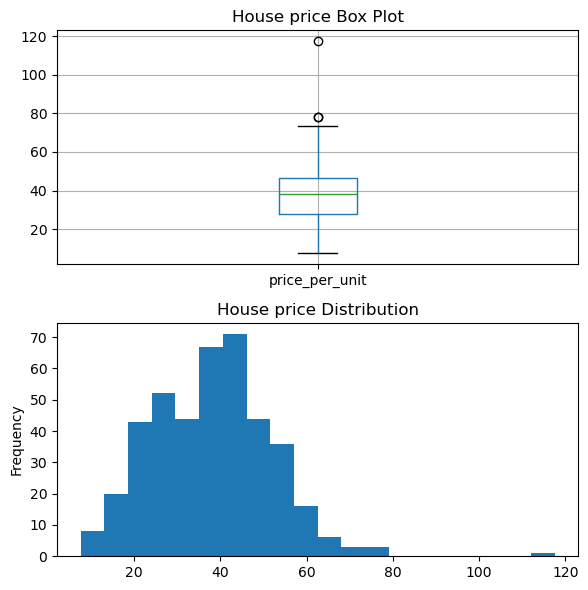

In [2]:
# Printing Boxplots and distribution to check outliers
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
data[["price_per_unit"]].boxplot(ax=axes[0])
axes[0].set_title("House price Box Plot")
data["price_per_unit"].plot.hist(ax=axes[1], bins=20)
axes[1].set_title("House price Distribution")
plt.tight_layout()
plt.show()

Removing Outliers

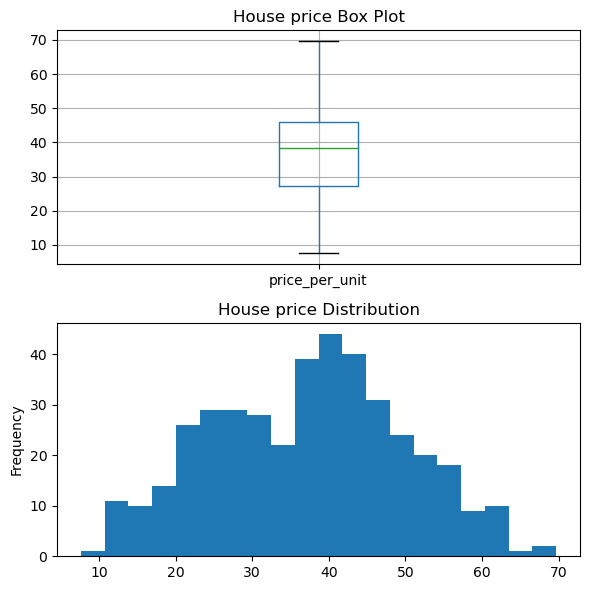

In [3]:
data = data[data['price_per_unit']<70]
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
data[["price_per_unit"]].boxplot(ax=axes[0])
axes[0].set_title("House price Box Plot")
data["price_per_unit"].plot.hist(ax=axes[1], bins=20)
axes[1].set_title("House price Distribution")
plt.tight_layout()
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


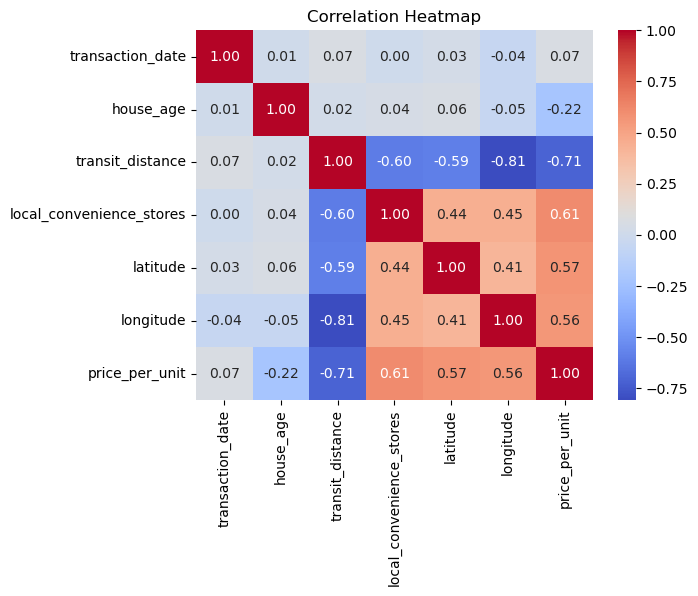

In [4]:
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Separating Training and Validation, also removing transaction date

In [5]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Preprocess the data and train a model in a pipeline

Normalize the numeric features, then use a different regression algorithms
We create a pipeline to preprocess and then train model using different algorithms
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* Support Vector Regressor using linear kernel
* Support Vector Regressor using radial bias function kernel


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create a list of regression algorithms to try
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(kernel='linear'),
    SVR(kernel='rbf'),
]

LinearRegression: RMSE = 7.63, R2 = 0.50


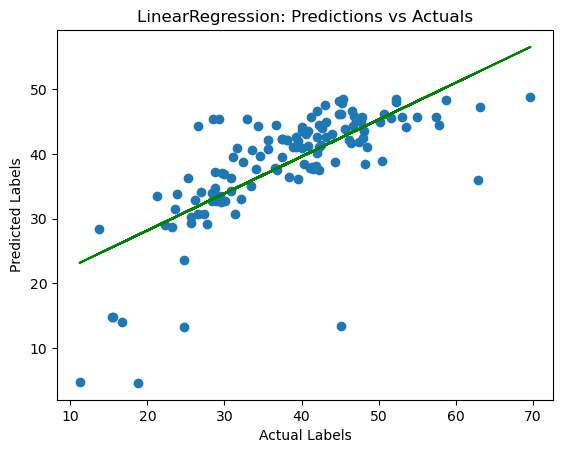

DecisionTreeRegressor: RMSE = 8.40, R2 = 0.40


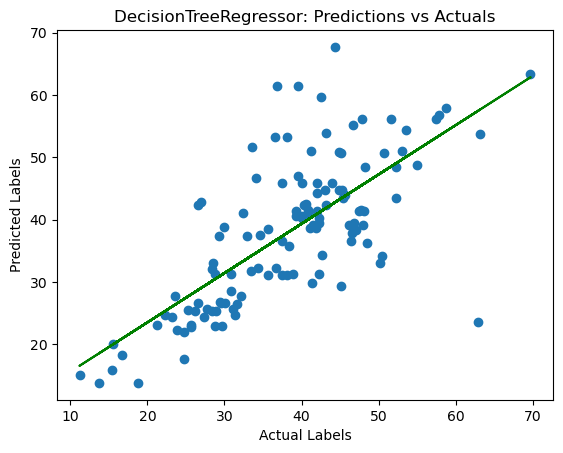

RandomForestRegressor: RMSE = 6.13, R2 = 0.68


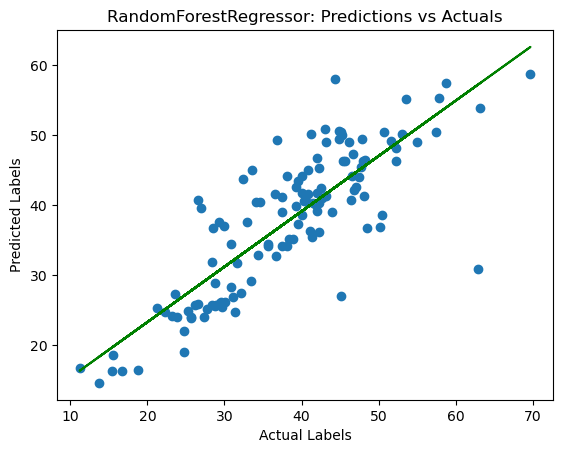

GradientBoostingRegressor: RMSE = 6.22, R2 = 0.67


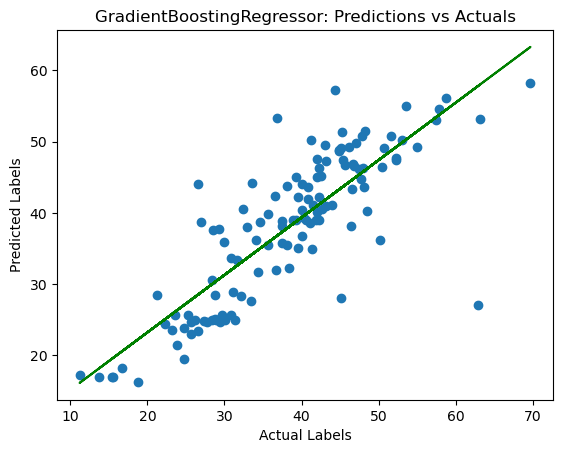

SVR: RMSE = 7.66, R2 = 0.50


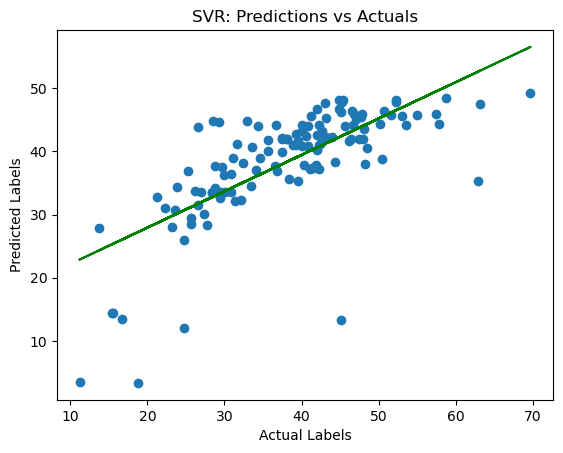

SVR: RMSE = 6.92, R2 = 0.59


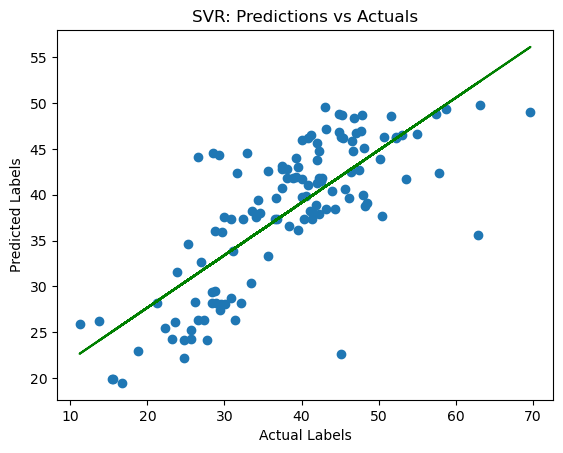

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f'{model.__class__.__name__}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

    # Plot predicted vs actual
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title(f'{model.__class__.__name__}: Predictions vs Actuals')
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='green')
    plt.show()

Based on the RMSE and R2 scores, it appears that the RandomForestRegressor algorithm performed the best on this dataset, with an RMSE of 5.98 and an R2 score of 0.69.<br> The GradientBoostingRegressor algorithm also performed well, with an RMSE of 6.20 and an R2 score of 0.67.<br> The DecisionTreeRegressor algorithm had a higher RMSE of 8.16 and a lower R2 score of 0.43, indicating that it may be more sensitive to the specific training data.<br> The LinearRegression and SVR algorithms had similar RMSE and R2 scores, indicating that they may not be as well-suited for this dataset.<br><br> Overall, the RandomForestRegressor and GradientBoostingRegressor algorithms are good candidates for further tuning and evaluation on this dataset.

Using the models to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [8]:
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    results = pipeline.predict(X_new)
    print(f'{model.__class__.__name__}: Predictions = {results}')

LinearRegression: Predictions = [45.77727183 14.78628969]
DecisionTreeRegressor: Predictions = [48.8 15.9]
RandomForestRegressor: Predictions = [48.96636667 16.36033333]
GradientBoostingRegressor: Predictions = [49.30328352 17.04546395]
SVR: Predictions = [45.71720138 14.41482561]
SVR: Predictions = [46.66171504 19.94025022]
